In this project, we aim to investigate the sources of spatial heterogeneity in glioblastoma multiforme using mathematical modeling.
We include the following sources of heterogeneity:
- genetic heterogeneity
- phenotypic heterogeneity (go-or-grow)

To this end, we adapt a CA model of glioblastoma multiforme from [1] that includes the go-or-grow hypothesis.
We then investigate the effects of genetic heterogeneity on the growth dynamics of the tumor.

### Plan
Things to consider:
- Should we include oxygen? If so, include a hypoxic region in the center of the tumor?
- Should we include directed motion, e.g., based on an oxygen gradient?
Let's start with this:
1. Change go-or-grow model to include a realistic mutation probability
2. A mutation might change: Proliferation rate, or phenotypic switch parameter
 

In [1]:
from lgca import get_lgca
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
capacity = 100
std_kappa = 2.
r_d = 0.02
r_b = 0.5
kappa = 2
theta = .1
r_mut = 0.0001
s_d = 1.
L = 150

In [4]:
nodes0 = np.zeros((L, L, 7))
nodes0[L//2-1:L//2+2, L//2-1:L//2+2, -1] = capacity

In [5]:
lgca = get_lgca(geometry='hex', dims=(L, L), interaction='go_or_grow_glioblastoma', ve=False, ib=True, capacity=capacity, kappa_std=std_kappa, r_d=r_d, r_b=r_b, kappa=kappa, theta=theta, nodes=nodes0, r_m=r_mut, fitness_increase=s_d)

In [6]:
lgca.timeevo(100, record=True, recordfampop=True)

  0%|          | 0/100 [00:00<?, ?it/s]

In [11]:
lgca.animate_density()

Text(0.5, 1.0, 'Cell density')

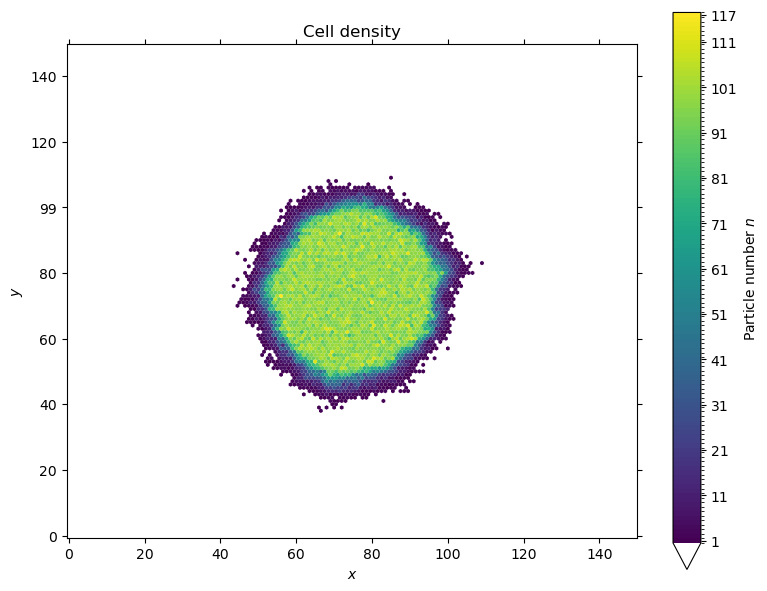

In [7]:
lgca.plot_density()
plt.title('Cell density')

Text(0.5, 1.0, 'Mueller plot')

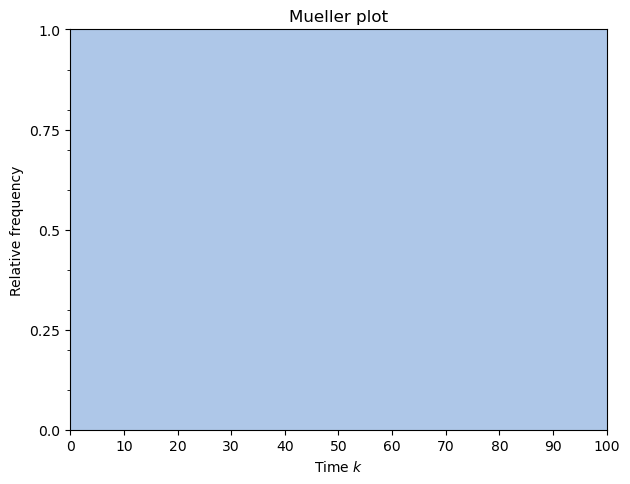

In [8]:
cutoff_rel = 0.01
_, _, _, fcmap = lgca.muller_plot(cutoff_rel=cutoff_rel)
plt.title('Mueller plot')

In [9]:
cells_t = lgca.nodes_t.sum(-1)

In [10]:
families_loc_t = np.zeros(cells_t.shape, dtype=int)
for ind, cells in np.ndenumerate(cells_t):
    if len(cells) == 0:
        continue
    else:
        values, counts = np.unique([lgca.props['family'][cell] for cell in cells], return_counts=True)
        ind2 = np.argmax(counts)
        families_loc_t[ind] = values[ind2]

Text(0.5, 1.0, 'Locally dominant subclone')

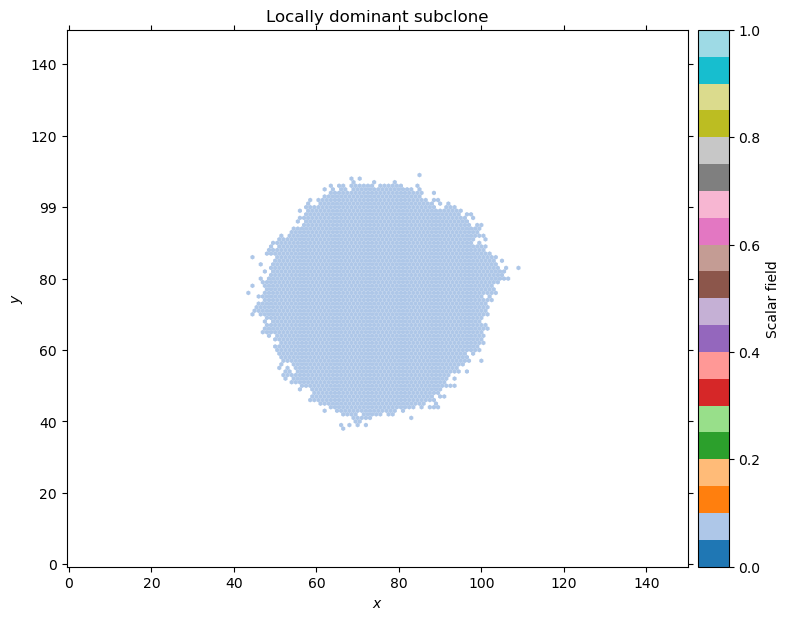

In [11]:
t = -1
import matplotlib.pyplot as plt
plt.figure()
# print(np.unique(families_loc_t[t]))
_, pc, _ = lgca.plot_scalarfield(families_loc_t[t], cmap='tab20', cbar=True)
pc.set_facecolor([fcmap(famid) for famid in families_loc_t[t].ravel()])
pc.set_alpha(np.heaviside(lgca.dens_t[t], 0))
pc.set_edgecolor('none')
plt.title('Locally dominant subclone')

In [12]:
lgca.propagate_family_prop_to_cells('kappa')
lgca.propagate_family_prop_to_cells('r_b')
lgca.calc_prop_mean_spatiotemp()

{'family': masked_array(
   data=[[[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --]],
 
         ...,
 
         [[--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          [--, --, --, ..., --, --, --],
          ...,
          [--, --, --, ..., -

Text(0.5, 1.0, 'Phenotypic switch parameter')

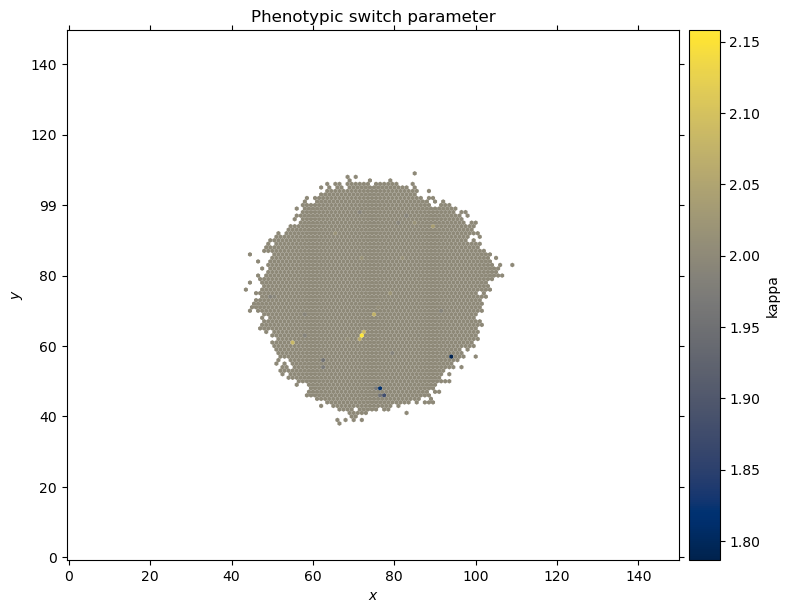

In [13]:
plt.figure()
lgca.plot_prop_spatial(propname='kappa')
plt.title('Phenotypic switch parameter')

Text(0.5, 1.0, 'Cell density')

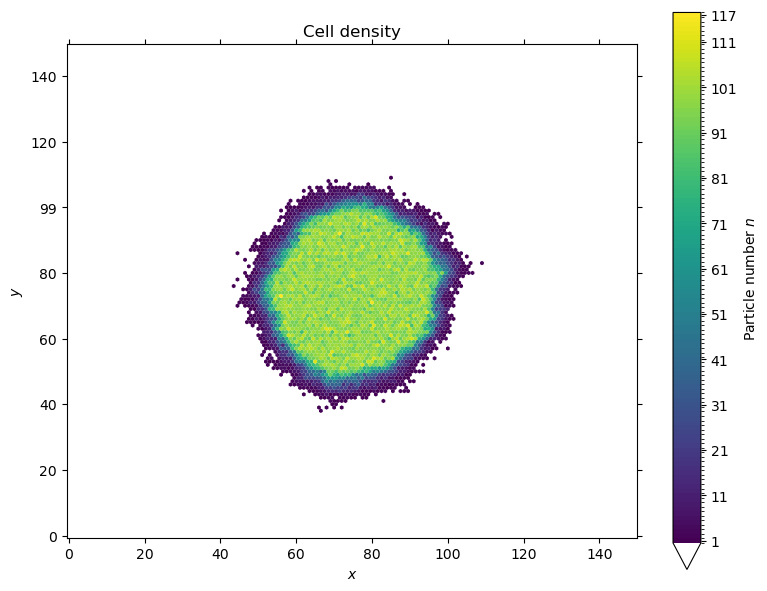

In [14]:
plt.figure()
lgca.plot_density()
plt.title('Cell density')

In [15]:
resting_cells = lgca.channel_pop[..., -1]
migrating_cells = lgca.cell_density - resting_cells

Text(0.5, 1.0, 'Resting/proliferating cells')

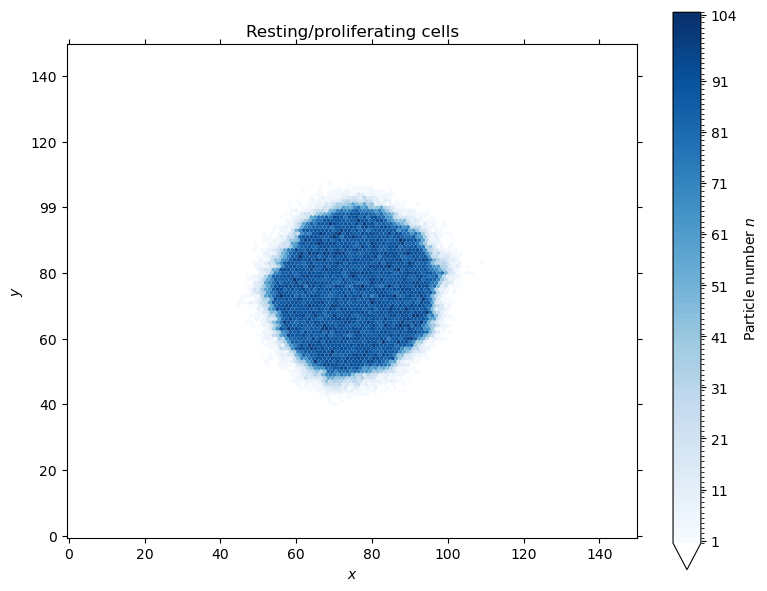

In [16]:
plt.figure()
lgca.plot_density(resting_cells[lgca.nonborder], cmap='Blues')
plt.title('Resting/proliferating cells')

Text(0.5, 1.0, 'Migrating cells')

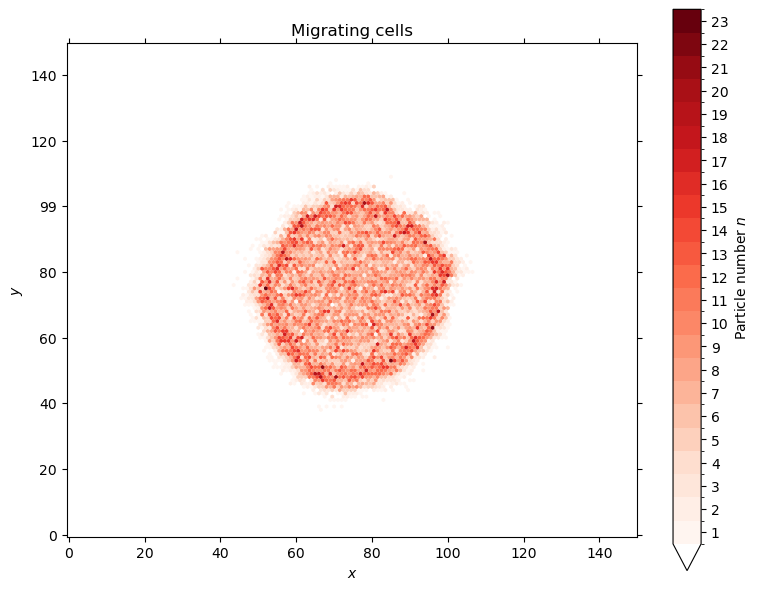

In [17]:
plt.figure()
lgca.plot_density(migrating_cells[lgca.nonborder], cmap='Reds')
plt.title('Migrating cells')

Text(0.5, 1.0, 'Growth rate')

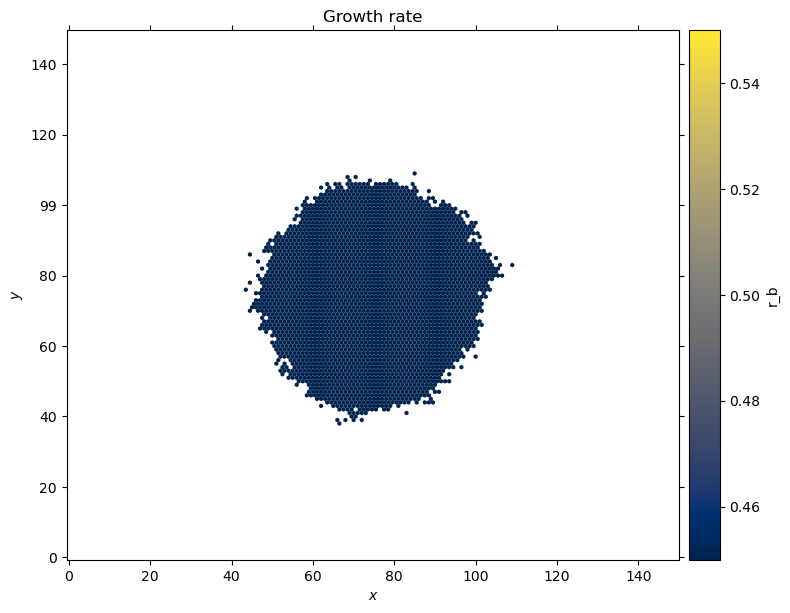

In [18]:
plt.figure()
lgca.plot_prop_spatial(propname='r_b')
plt.title('Growth rate')

In [43]:
# mean_r_b = lgca.mean_prop_t['r_b'][-1]
# effective_growthrate = mean_r_b * resting_cells[lgca.nonborder]/lgca.dens_t[-1] * np.maximum(1 - lgca.dens_t[-1]/lgca.capacity, 0)
# lgca.plot_scalarfield(effective_growthrate, cmap='gray_r')


### Observations
- Anisotropic growth
- anisotropic distribution of migration
- would probably be even more pronounced with a hypoxic region?
- tests: recurrency time vs. spatial anisotropy?